In [1]:
# CIFAR 10 DATASETS LABEL AND INXED 

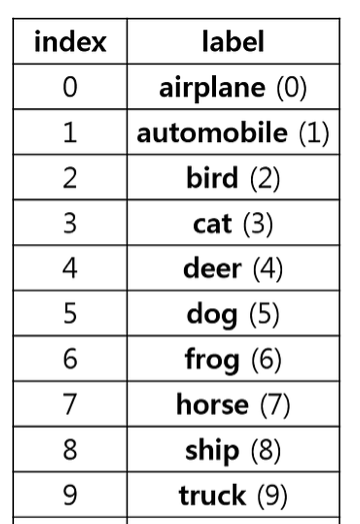

#### STEP 1: IMPORT NECESSARY LIBRARIES AND DATASETS

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#  importing datasets
from keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

#### STEP 2: VISUALIZATION DATASETS

[8]


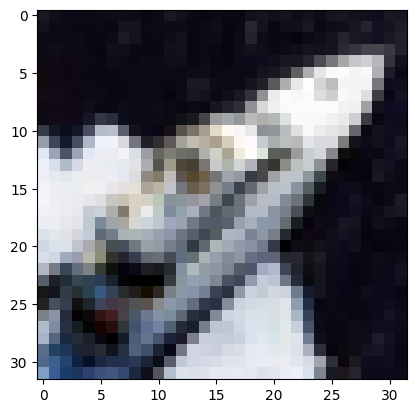

In [10]:
i = 20000
plt.imshow(X_train[i])
print(y_train[i])

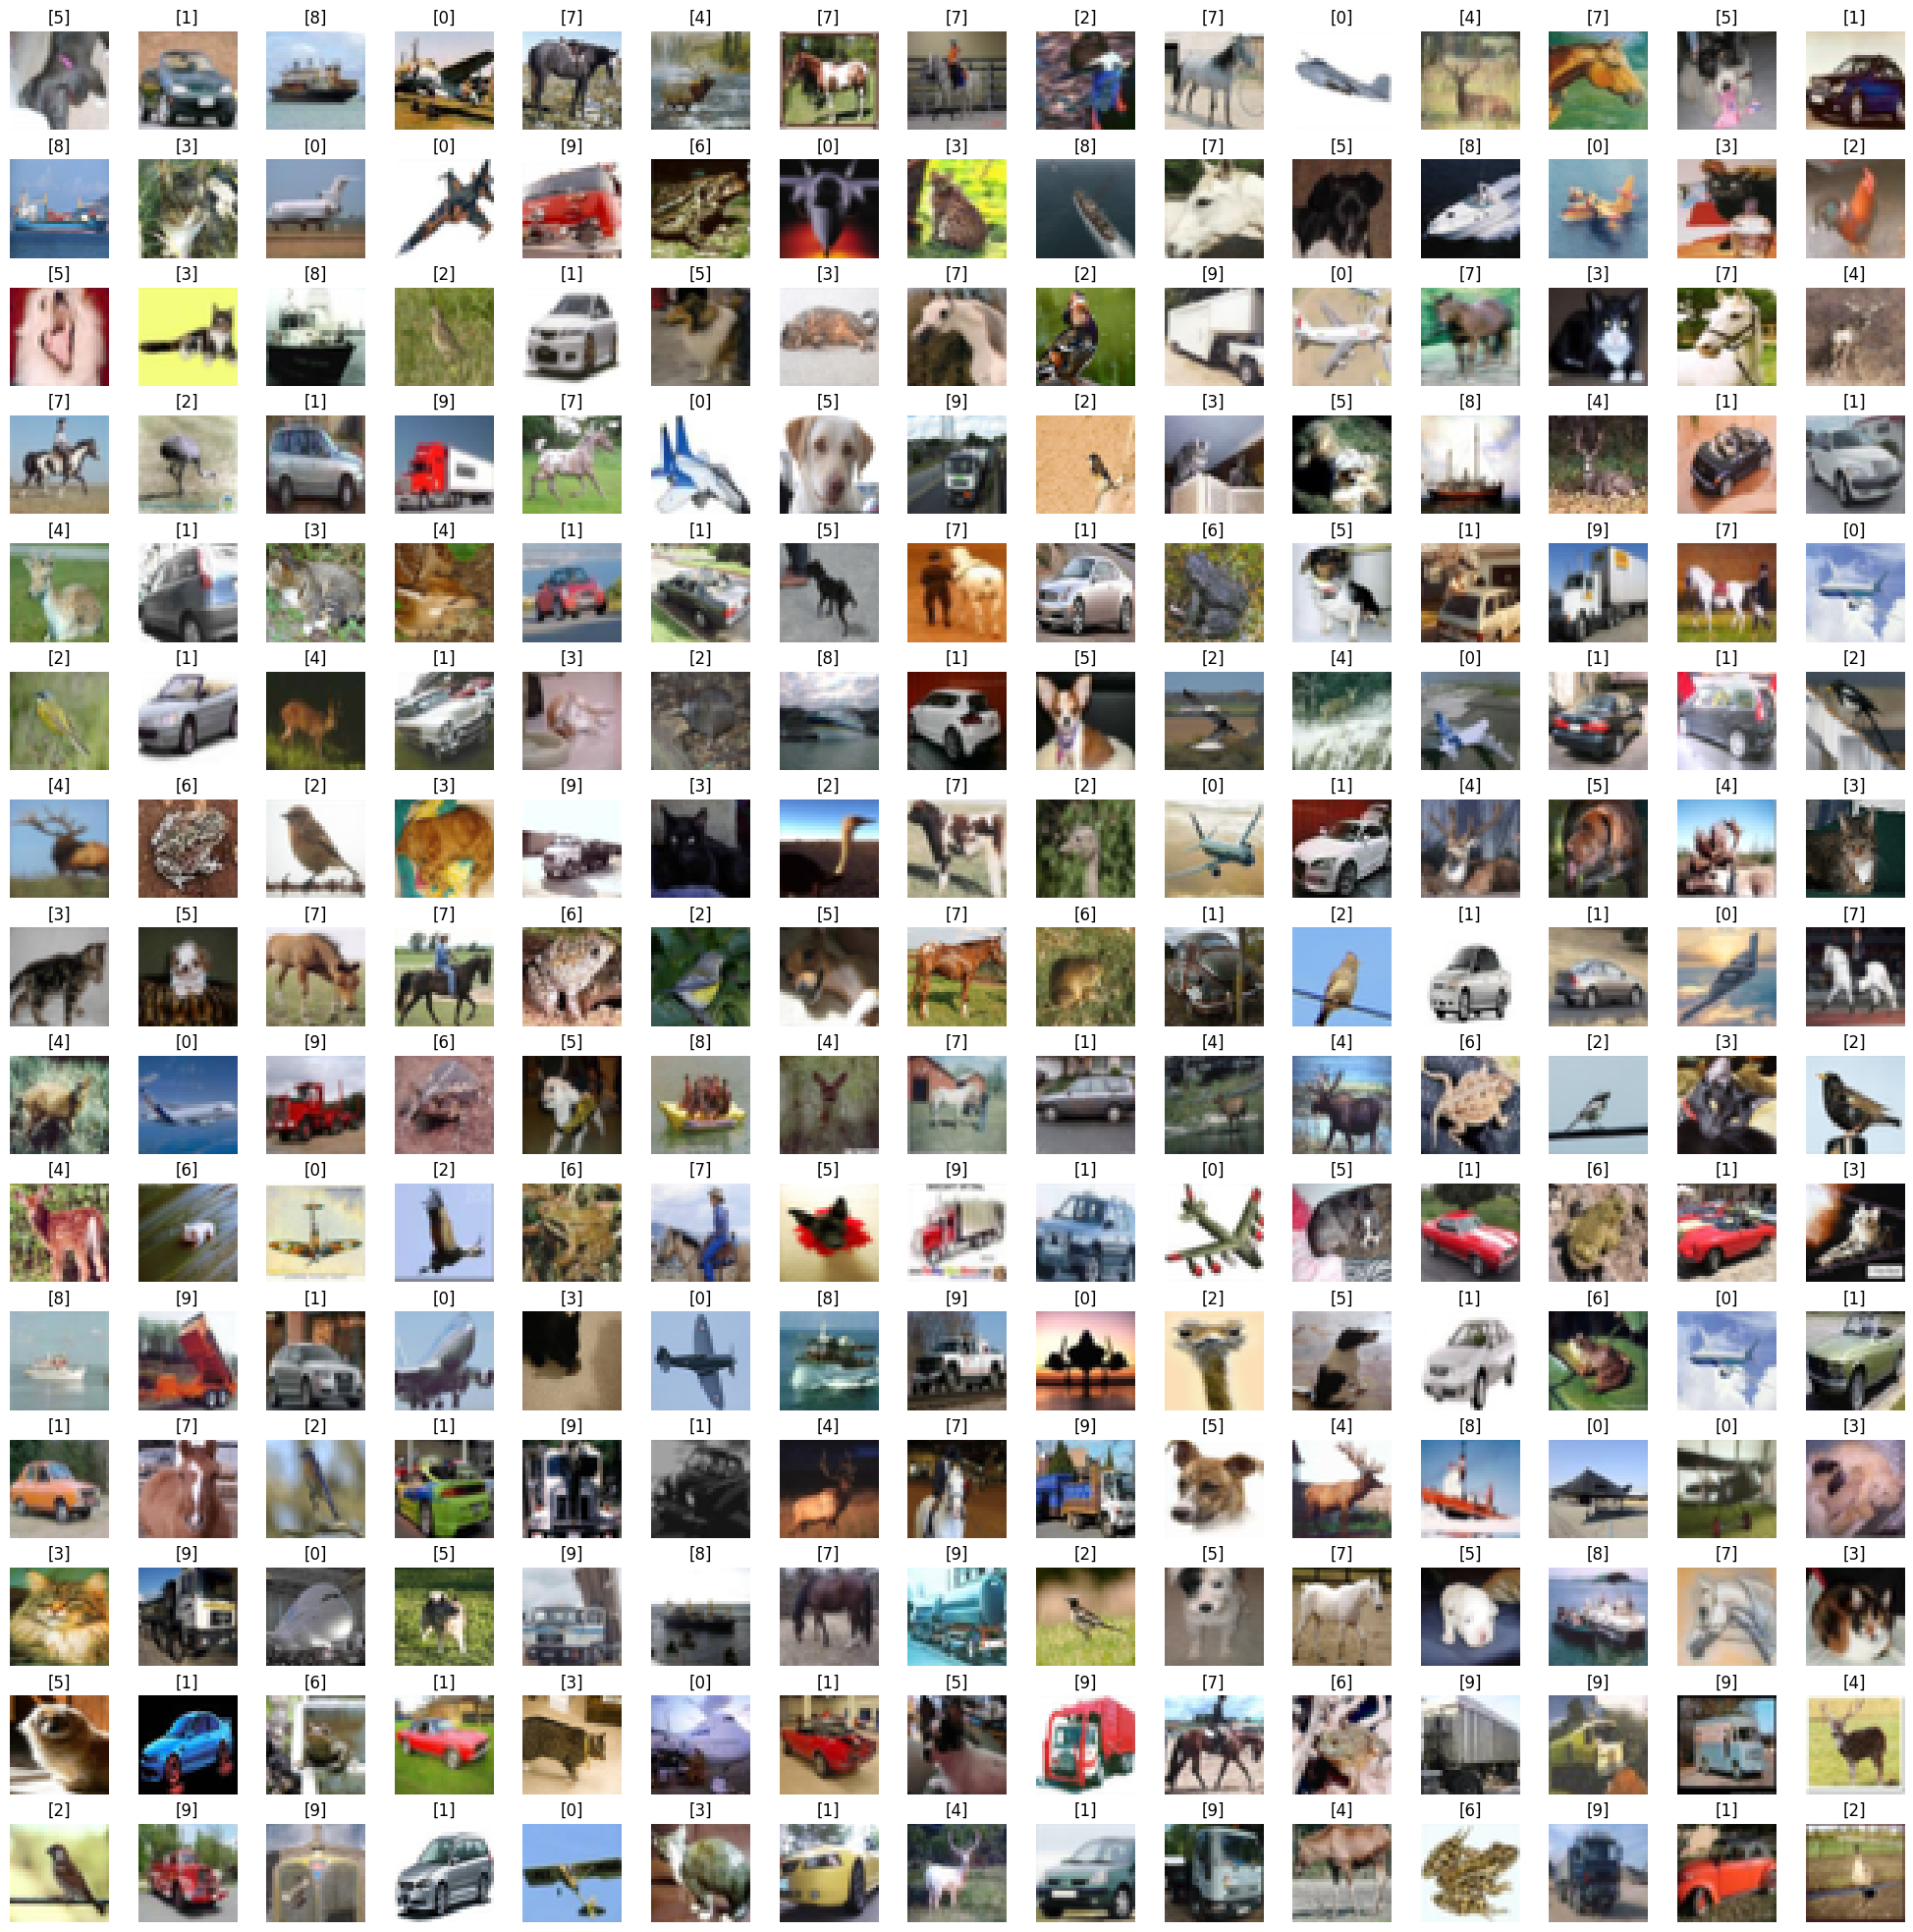

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel() # flattening image 


n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # picking random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.3)


In [12]:
n_training

50000

#### STEP 3: DATA PREPERATION

In [14]:
# converting X_train, X_test into float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
number_catogries = 10 

In [16]:
# conerting y_train and y_test into categorial/binary form 
import keras

y_train = keras.utils.to_categorical(y_train, number_catogries)
y_test = keras.utils.to_categorical(y_test, number_catogries)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [19]:
# Normalize X_train, X_test
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
X_train.dtype

dtype('float32')

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
# we only need (32,32,3)
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

#### STEP 4: TRAINING MODEL 

In [25]:
import tensorflow

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()

In [28]:
# creating convolutional layer 
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=Input_shape ))

# Second concolutional layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))

# Creating Maxpooling
cnn_model.add(MaxPooling2D(2,2))

# Droping out units:neurons
cnn_model.add(Dropout(0.2))

# Again repeating process
# creating convolutional layer 
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))

# Second concolutional layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))

# Creating Maxpooling
cnn_model.add(MaxPooling2D(2,2))

# Droping out units:neurons
cnn_model.add(Dropout(0.2))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Flattening convolutional layer 
cnn_model.add(Flatten())

In [30]:
# Creating neural network 
# 1st layer
cnn_model.add(Dense(units=512, activation='relu'))

# 2nd hidden layer
cnn_model.add(Dense(units=512, activation='relu'))

# ouput layer
cnn_model.add(Dense(units=10, activation='softmax'))


In [31]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
y_train.shape

(50000, 10)

In [33]:
# compiling model
cnn_model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.RMSprop(learning_rate= 0.001), metrics=['accuracy'] )

# fit trainig data to model
history= cnn_model.fit(X_train, y_train, batch_size=50, epochs=30, shuffle= True)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.3030 - loss: 1.8892
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.5613 - loss: 1.2326
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.6585 - loss: 0.9792
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.7125 - loss: 0.8351
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.7473 - loss: 0.7343
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.7692 - loss: 0.6642
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.7934 - loss: 0.6097
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8028 - loss: 0.5785
Epoch 9/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8124 - loss: 0.5491
Epoch 10/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8189 - loss: 0.5300
Epoch 11/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8306 - loss: 0.5097
Epoch 12

#### STEP 5: EVALUATE THE MODEL

In [35]:
X_test.shape

(10000, 32, 32, 3)

In [36]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7744 - loss: 0.9294


In [37]:
print("Test Accuracy:{}".format(evaluation[1]))

Test Accuracy:0.7703999876976013


In [38]:
# Get predicted probabilities
predicted_probabilities = cnn_model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [39]:
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [40]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [41]:
# converting into argmax 
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

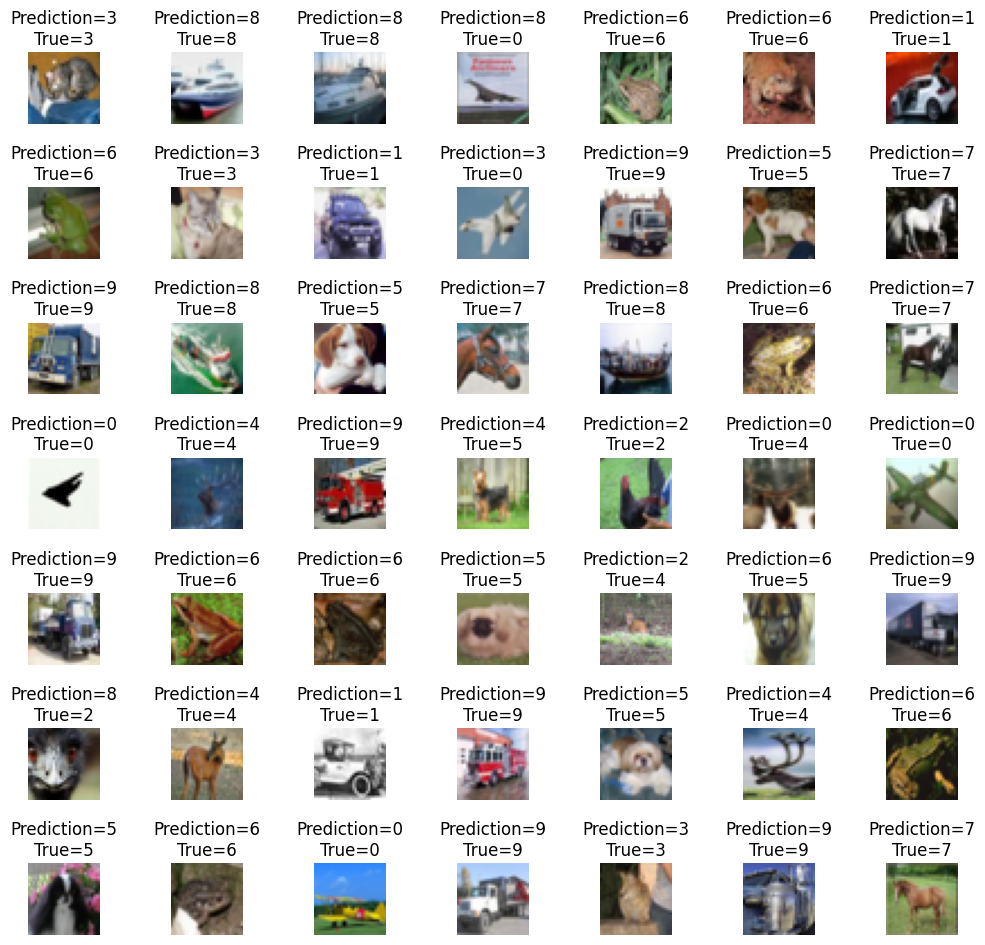

In [43]:
L= 7
W= 7

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction={predicted_classes[i]}\nTrue={y_test[i]}')
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[828,  16,  26,   4,  13,   3,   5,  10,  69,  26],
       [  6, 915,   6,   1,   2,   0,   3,   0,  24,  43],
       [ 60,   5, 735,  30,  47,  25,  45,  28,  14,  11],
       [ 43,  16,  92, 460,  80, 146,  71,  36,  22,  34],
       [ 17,   4,  80,  20, 748,  23,  29,  61,  12,   6],
       [ 18,  12,  85,  98,  52, 630,  28,  51,  11,  15],
       [ 12,   4,  57,  38,  26,   6, 828,   8,  11,  10],
       [ 25,   7,  31,  17,  40,  25,   3, 820,  12,  20],
       [ 41,  24,  15,   4,   4,   3,   2,   2, 885,  20],
       [ 18,  86,   5,   2,   3,   4,   3,   1,  23, 855]])

<Axes: >

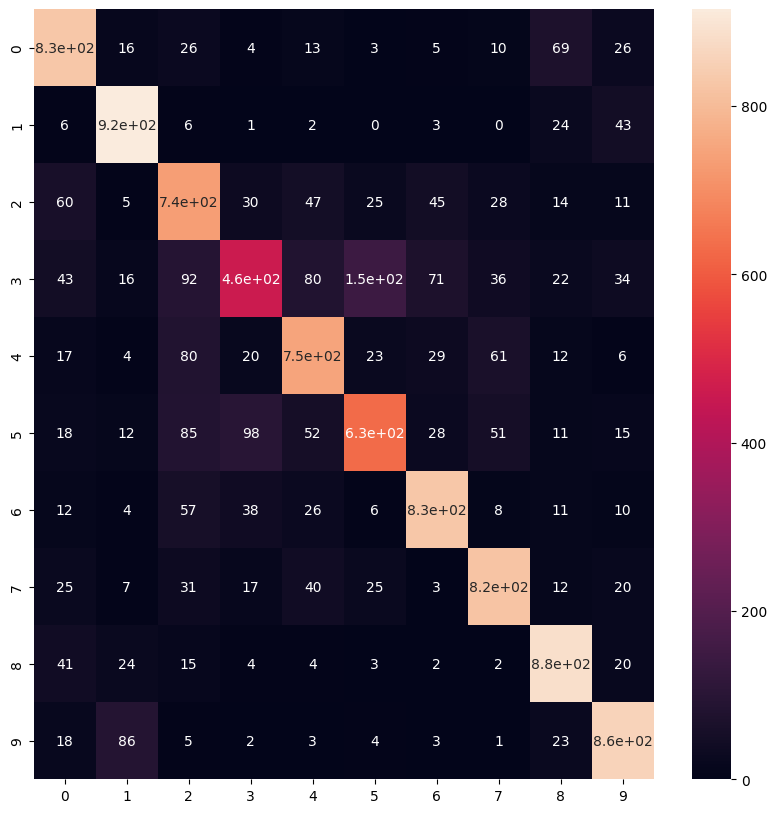

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

#### STEP 6: SAVING MODEL

In [47]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras-cifar10-model.h5')
cnn_model.save(model_path)

#### STEP 7: DATA AUGMENTATION AND RETRAINING 

In [86]:
import keras

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [92]:
datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
)

In [98]:
datagen.fit(X_train)

In [100]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size=50), epochs=30)

Epoch 1/30
   3/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.2889 - loss: 3.7977  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.3843 - loss: 1.7684
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.4569 - loss: 1.5249
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.4890 - loss: 1.4478
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.5022 - loss: 1.4139
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.5175 - loss: 1.3728
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.5237 - loss: 1.3582
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.5400 - loss: 1.3184
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.5397 - loss: 1.3191
Epoch 9/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.5436 - loss: 1.3061
Epoch 10/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.5504 - loss: 1.2909
Epoch 11/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.5595 - loss: 1.2710
Epoch 12/30
1000/10

In [110]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [112]:
score = cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6344 - loss: 1.0838


In [114]:
print('Test accuracy', score[1])

Test accuracy 0.6327999830245972


In [122]:
# save new augmented_model
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras-cifar10-augmented-model.h5')
cnn_model.save(model_path)